# Task 2 :- Utilize 'MNIST' Dataset to Train a Convolutional Neural Network Model 

# Step 1 :- Data Preparation 

## Import Necessary Libraries

In [2]:
pip install tensorflow


     -------------------------------------- 284.1/284.1 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 413.2/413.2 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 183

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

## Load and preprocess the MNIST dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 2 :- Model Architecture and Training 

## Resize MNIST images to fit the VGG16 input shape

In [25]:
train_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in train_images])
test_images_resized = np.array([img_to_array(array_to_img(img, scale=False).resize((48, 48))) for img in test_images])

In [26]:
# VGG16 expects color images, so duplicate the single channel to create three channels
train_images_resized = np.stack((train_images_resized[:, :, :, 0],) * 3, axis=-1)
test_images_resized = np.stack((test_images_resized[:, :, :, 0],) * 3, axis=-1)

## CNN Model with Dropout Regularization

In [6]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dropout(0.5))  # Dropout layer for regularization
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

## Compile the CNN model

In [7]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [27]:
# Transfer Learning Model with Dropout Regularization
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout layer for regularization
predictions = Dense(10, activation='softmax')(x)

In [30]:
transfer_model = Model(inputs=base_model.input, outputs=predictions)

## Compile the Transfer Learning model

In [31]:
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [13]:
# Callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

## Train the CNN model

In [14]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64,
                            validation_data=(test_images, test_labels), callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
938/938 [==============================] - 51s 50ms/step - loss: 0.2309 - accuracy: 0.9270 - val_loss: 0.0496 - val_accuracy: 0.9831
Epoch 2/10
  1/938 [..............................] - ETA: 58s - loss: 0.0176 - accuracy: 1.0000

C:\Users\Admin\New folder\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 46s 49ms/step - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 3/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 4/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0273 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0256 - val_accuracy: 0.9918
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0245 - val_accuracy: 0.9932
Epoch 7/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.0266 - val_accuracy: 0.9920
Epoch 8/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0264 - val_accuracy: 0.9912
Epo

## Train the Transfer Learning model

In [32]:
transfer_history = transfer_model.fit(train_images_resized, train_labels, epochs=10, batch_size=64,
                                      validation_data=(test_images_resized, test_labels), callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
938/938 [==============================] - 636s 673ms/step - loss: 2.1963 - accuracy: 0.1884 - val_loss: 2.0943 - val_accuracy: 0.2485
Epoch 2/10
938/938 [==============================] - 602s 642ms/step - loss: 2.0715 - accuracy: 0.2484 - val_loss: 2.0205 - val_accuracy: 0.2782
Epoch 3/10
938/938 [==============================] - 1333s 1s/step - loss: 2.0117 - accuracy: 0.2719 - val_loss: 1.9610 - val_accuracy: 0.2877
Epoch 4/10
938/938 [==============================] - 587s 626ms/step - loss: 1.9735 - accuracy: 0.2888 - val_loss: 1.9169 - val_accuracy: 0.3084
Epoch 5/10
938/938 [==============================] - 582s 621ms/step - loss: 1.9442 - accuracy: 0.2950 - val_loss: 1.9019 - val_accuracy: 0.3081
Epoch 6/10
938/938 [==============================] - 582s 620ms/step - loss: 1.9249 - accuracy: 0.3048 - val_loss: 1.8869 - val_accuracy: 0.3174
Epoch 7/10
938/938 [==============================] - 584s 623ms/step - loss: 1.9088 - accuracy: 0.3119 - val_loss: 1.8605 - v

# Step 3 :- Model Evaluation 

## Plot training history for CNN model

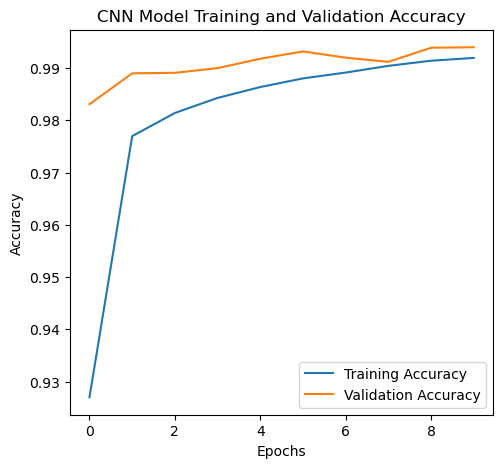

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

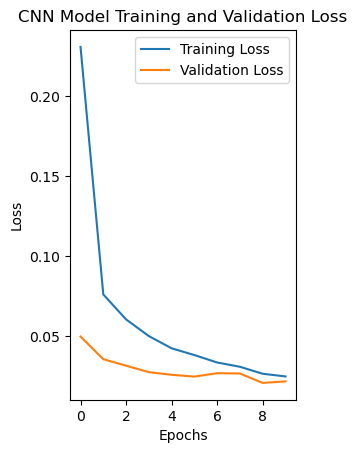

In [34]:
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plot training history for Transfer Learning model

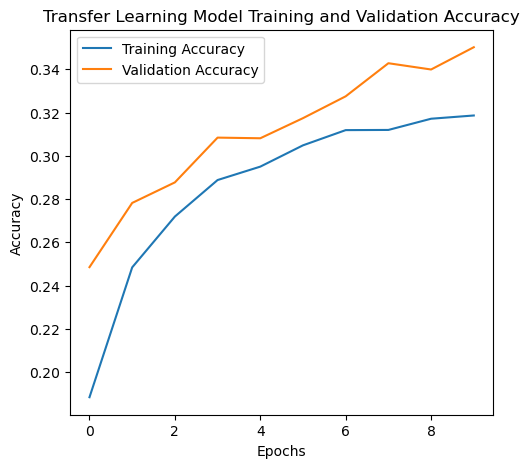

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(transfer_history.history['accuracy'], label='Training Accuracy')
plt.plot(transfer_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

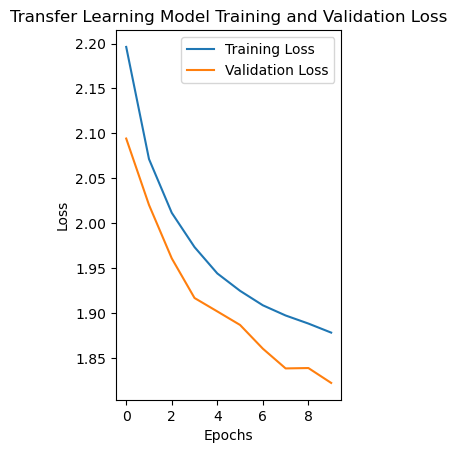

In [36]:
plt.subplot(1, 2, 2)
plt.plot(transfer_history.history['loss'], label='Training Loss')
plt.plot(transfer_history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluate CNN Model

In [37]:
cnn_train_preds = np.argmax(cnn_model.predict(train_images), axis=1)
cnn_test_preds = np.argmax(cnn_model.predict(test_images), axis=1)

313/313 [==============================] - 5s 16ms/step


In [38]:
print("CNN Model:")
print("Training Accuracy:", accuracy_score(np.argmax(train_labels, axis=1), cnn_train_preds))
print("Testing Accuracy:", accuracy_score(np.argmax(test_labels, axis=1), cnn_test_preds))
print("\nClassification Report:")
print(classification_report(np.argmax(test_labels, axis=1), cnn_test_preds))

CNN Model:
Training Accuracy: 0.9973
Testing Accuracy: 0.994

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Evaluate Transfer Learning Model

In [39]:
transfer_train_preds = np.argmax(transfer_model.predict(train_images_resized), axis=1)
transfer_test_preds = np.argmax(transfer_model.predict(test_images_resized), axis=1)

313/313 [==============================] - 122s 388ms/step


In [40]:
print("\nTransfer Learning Model:")
print("Training Accuracy:", accuracy_score(np.argmax(train_labels, axis=1), transfer_train_preds))
print("Testing Accuracy:", accuracy_score(np.argmax(test_labels, axis=1), transfer_test_preds))
print("\nClassification Report:")
print(classification_report(np.argmax(test_labels, axis=1), transfer_test_preds))


Transfer Learning Model:
Training Accuracy: 0.35131666666666667
Testing Accuracy: 0.3502

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.54      0.34       980
           1       0.38      0.63      0.48      1135
           2       0.56      0.14      0.22      1032
           3       0.42      0.25      0.31      1010
           4       0.30      0.35      0.32       982
           5       0.29      0.17      0.22       892
           6       0.57      0.36      0.44       958
           7       0.32      0.54      0.40      1028
           8       0.35      0.17      0.23       974
           9       0.48      0.29      0.36      1009

    accuracy                           0.35     10000
   macro avg       0.39      0.34      0.33     10000
weighted avg       0.39      0.35      0.34     10000



# Step 4 :- Overfitting/Underfitting Analysis

## Plot Confusion Matrix for CNN Model

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm_cnn = confusion_matrix(np.argmax(test_labels, axis=1), cnn_test_preds)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('CNN Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

## Plot Confusion Matrix for Transfer Learning Model

Text(321.26767676767673, 0.5, 'True')

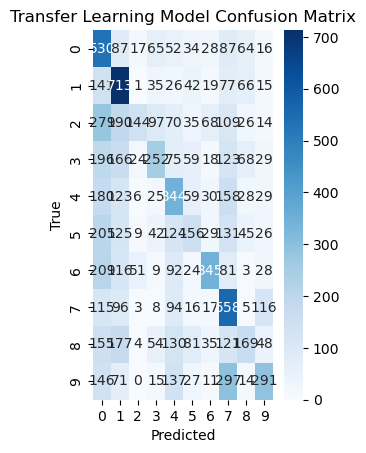

In [43]:
plt.subplot(1, 2, 2)
cm_transfer = confusion_matrix(np.argmax(test_labels, axis=1), transfer_test_preds)
sns.heatmap(cm_transfer, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Transfer Learning Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

1/1 [==============================] - 0s 47ms/step


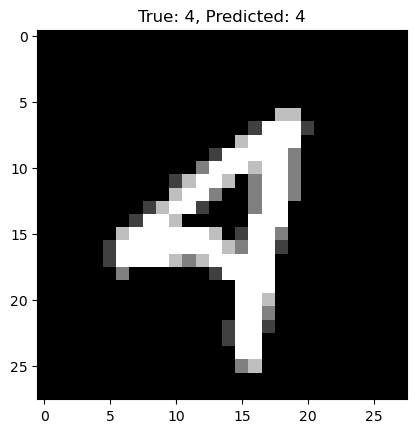

1/1 [==============================] - 0s 45ms/step


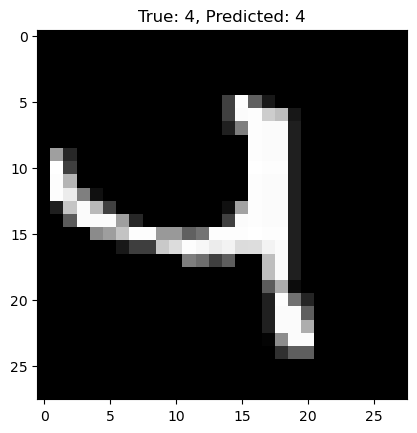

1/1 [==============================] - 0s 48ms/step


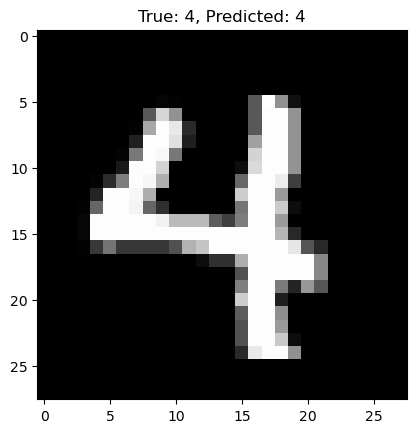

1/1 [==============================] - 0s 54ms/step


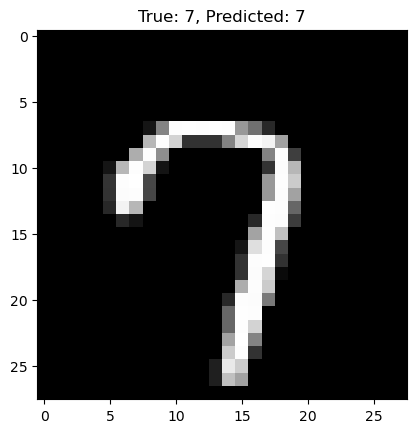

1/1 [==============================] - 0s 32ms/step


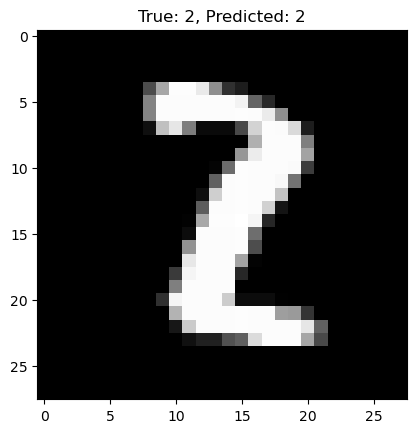

In [45]:
import random

random_indices = random.sample(range(len(test_images)), 5)
for index in random_indices:
    image = test_images[index].reshape(28, 28)
    true_label = np.argmax(test_labels[index])
    predicted_label = np.argmax(cnn_model.predict(test_images[index].reshape(1, 28, 28, 1)))

    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.show()